In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_infy = df[df['Symbol'] == 'INFY'].copy()
df_infy.sort_values("Date", inplace=True)

In [2]:
df = pd.read_csv("NIFTY50_all.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
print("Missing values before cleaning:")
print(df_infy.isnull().sum())

df_infy.dropna(inplace=True)
df_infy.drop_duplicates(inplace=True)
df_infy.reset_index(drop=True, inplace=True)

print("\nMissing values after cleaning:")
print(df_infy.isnull().sum())

print("\nShape after cleaning:", df_infy.shape)


Missing values before cleaning:
Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                 0
Deliverable Volume     0
%Deliverble            0
MA20                  19
MA50                  49
dtype: int64

Missing values after cleaning:
Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
MA20                  0
MA50                  0
dtype: int64

Shape after cleaning: (2387, 17)


In [12]:
df_infy[['Date', 'Open', 'High', 'Low', 'Close']].head()

Date    Open     High      Low    Close
0 2011-09-09  2328.1  2328.10  2261.00  2274.30
1 2011-09-12  2208.0  2217.35  2180.65  2198.45
2 2011-09-13  2223.1  2259.70  2195.75  2222.05
3 2011-09-14  2251.0  2366.90  2249.00  2351.65
4 2011-09-15  2378.0  2428.50  2330.00  2409.90

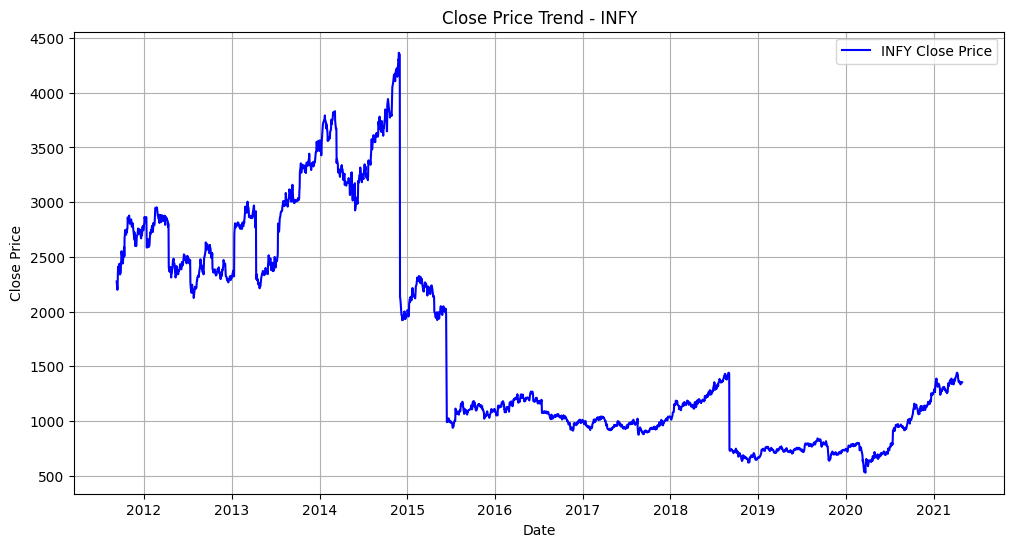

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_infy['Date'], df_infy['Close'], label="INFY Close Price", color='blue')
plt.title("Close Price Trend - INFY")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()



In [14]:
df_infy['MA20'] = df_infy['Close'].rolling(window=20).mean()
df_infy['MA50'] = df_infy['Close'].rolling(window=50).mean()

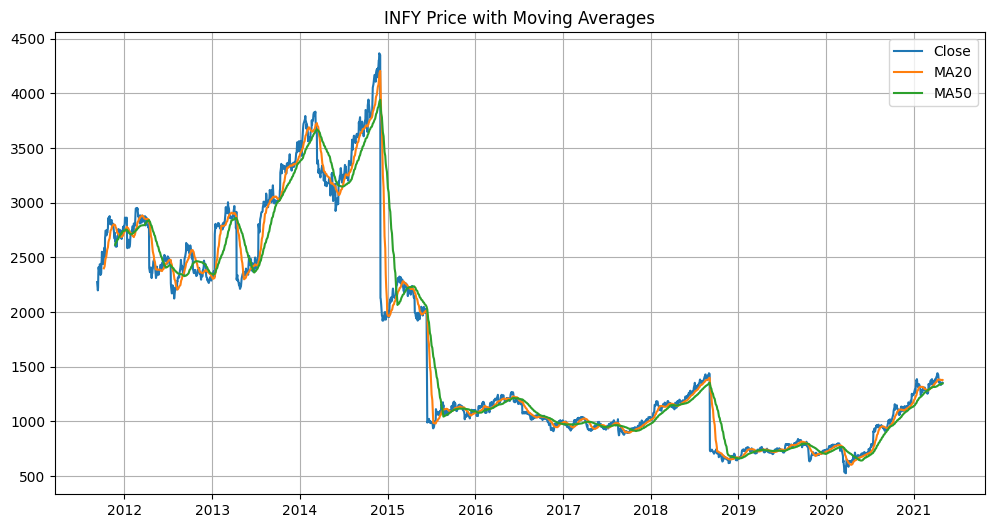

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_infy['Date'], df_infy['Close'], label='Close')
plt.plot(df_infy['Date'], df_infy['MA20'], label='MA20')
plt.plot(df_infy['Date'], df_infy['MA50'], label='MA50')
plt.legend()
plt.title('INFY Price with Moving Averages')
plt.grid(True)
plt.show()

In [16]:
X = df_infy[['Open', 'High', 'Low', 'Volume']]
y = df_infy['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² Score: 0.9998833257570351
RMSE: 10.408914843608134


In [19]:
df_infy.to_csv("infy_cleaned.csv", index=False)